# The Cancer Gene Atlas Cancer (TCGA) - Mesothelioma (MESO)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Tue May 01 11:25:02 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Mesothelioma [MESO]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-TS-A8AV,4809,MESO,TCGA,E93761B9-E0A2-48D5-8B21-A6670021CAE4,TS,55.0,NaN,418,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-3H-AB3K,4955,MESO,TCGA,E90BFE17-2E5B-47ED-B986-B3D4181F2BF6,3H,64.0,NaN,418,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-3H-AB3O,4956,MESO,TCGA,2B715EB2-055E-4BC5-BC98-128E8BF6954F,3H,58.0,NaN,418,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,"Yes, History of Prior Malignancy",Thyroid gland,NaN,Prior Malignancy,NaN,NaN,NaN
TCGA-3H-AB3T,4957,MESO,TCGA,3210027D-A9C7-4EBB-8497-E3705BED7E40,3H,79.0,NaN,418,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-3H-AB3S,4958,MESO,TCGA,1C848577-C3A4-4830-ABFA-549992172396,3H,69.0,NaN,418,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,"Yes, History of Prior Malignancy","Ear, Bladder","Other, specify","Prior Malignancy, Prior Malignancy",NaN,NaN,NaN


In [16]:
sample_meta.shape

(87, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_MESO_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,fe8b28e6-e019-475a-bfd7-d5880a6967fe,e0848b76-e86a-4564-a5ae-f3daee48224d,3d627ad5-9b51-4caf-aa2c-645a184e7f30,da195984-1a09-46d9-93c3-544cc93ae437,c635ded2-c7a2-4d60-b9a1-c2d933e89b1c,9af6ff5c-fc37-4bf8-be98-af08fd41f8c9,03117c7b-8e3b-4f78-bf72-641902abd90c,8112112b-b75b-4dab-8185-1074f5d4bd0d,ab84c983-7fa3-4b44-9ed3-12654fb366a4,2e037bd2-0a91-47e9-97ab-a2488be01e81,...,b9863118-4700-422d-8292-c476c1f0af81,d4b55f1b-5688-4ca5-b519-cb6811457889,465f90cc-3b76-454a-a77d-be1003d0f30d,7dc8b816-8c89-49e3-8349-c26fa264dc51,030e0f2d-c05b-4546-bed2-eb7f38ff8ae4,38ff3684-47c4-4386-b94b-2adc62ab6396,3f20c02c-bbf0-43d9-ba42-5c9ee5c035fa,cdebbfc7-3762-45a5-9937-306eb50d73fb,4c5bcd53-a8f7-4054-83e3-e7cc2f441292,06e11878-13d7-4cdd-8a81-8e68e07d258a
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,183.80600,133.824000,148.73600,199.306000,76.516300,96.29430,116.536000,144.945000,123.74600,117.70900,...,90.12190,148.14100,165.71900,147.156000,229.775000,149.73600,133.118000,241.90100,120.37000,148.63000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,44.14970,5.882770,25.40580,51.219700,20.013300,40.86170,0.000000,22.695400,22.07080,20.86540,...,23.08860,32.69210,36.70720,45.055800,3.192110,30.81210,28.523700,38.55940,44.34470,38.13310
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,17.94930,7.081650,8.78255,12.016800,9.047790,11.56830,0.585656,9.664780,12.61490,15.19830,...,10.17060,11.32020,24.06290,14.231600,29.785500,8.67121,8.451090,11.02820,14.04160,14.50510
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,64.28030,20.625000,34.10010,47.188300,24.256000,41.83550,31.342900,44.529000,40.52570,46.56490,...,26.08220,33.80160,23.74030,57.713900,44.664200,28.13480,20.186000,56.15860,28.44570,24.96430
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,1.41483,0.329132,1.46948,0.545146,0.510483,1.88411,1.326750,0.522775,1.06395,1.92754,...,2.46244,7.07148,0.29578,0.773492,0.400568,5.89149,0.585244,0.82239,4.32857,5.59569


In [19]:
matrix.shape

(199169, 87)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)


In [21]:
matrix.head()

,fe8b28e6-e019-475a-bfd7-d5880a6967fe,e0848b76-e86a-4564-a5ae-f3daee48224d,3d627ad5-9b51-4caf-aa2c-645a184e7f30,da195984-1a09-46d9-93c3-544cc93ae437,c635ded2-c7a2-4d60-b9a1-c2d933e89b1c,9af6ff5c-fc37-4bf8-be98-af08fd41f8c9,03117c7b-8e3b-4f78-bf72-641902abd90c,8112112b-b75b-4dab-8185-1074f5d4bd0d,ab84c983-7fa3-4b44-9ed3-12654fb366a4,2e037bd2-0a91-47e9-97ab-a2488be01e81,...,b9863118-4700-422d-8292-c476c1f0af81,d4b55f1b-5688-4ca5-b519-cb6811457889,465f90cc-3b76-454a-a77d-be1003d0f30d,7dc8b816-8c89-49e3-8349-c26fa264dc51,030e0f2d-c05b-4546-bed2-eb7f38ff8ae4,38ff3684-47c4-4386-b94b-2adc62ab6396,3f20c02c-bbf0-43d9-ba42-5c9ee5c035fa,cdebbfc7-3762-45a5-9937-306eb50d73fb,4c5bcd53-a8f7-4054-83e3-e7cc2f441292,06e11878-13d7-4cdd-8a81-8e68e07d258a
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,183.80600,133.824000,148.73600,199.306000,76.516300,96.29430,116.536000,144.945000,123.74600,117.70900,...,90.12190,148.14100,165.71900,147.156000,229.775000,149.73600,133.118000,241.90100,120.37000,148.63000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,44.14970,5.882770,25.40580,51.219700,20.013300,40.86170,0.000000,22.695400,22.07080,20.86540,...,23.08860,32.69210,36.70720,45.055800,3.192110,30.81210,28.523700,38.55940,44.34470,38.13310
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,17.94930,7.081650,8.78255,12.016800,9.047790,11.56830,0.585656,9.664780,12.61490,15.19830,...,10.17060,11.32020,24.06290,14.231600,29.785500,8.67121,8.451090,11.02820,14.04160,14.50510
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,64.28030,20.625000,34.10010,47.188300,24.256000,41.83550,31.342900,44.529000,40.52570,46.56490,...,26.08220,33.80160,23.74030,57.713900,44.664200,28.13480,20.186000,56.15860,28.44570,24.96430
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,1.41483,0.329132,1.46948,0.545146,0.510483,1.88411,1.326750,0.522775,1.06395,1.92754,...,2.46244,7.07148,0.29578,0.773492,0.400568,5.89149,0.585244,0.82239,4.32857,5.59569


In [22]:
matrix.shape

(79930, 87)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-LK-A4O2-01,TCGA-LK-A4NY-01,TCGA-TS-A7P8-01,TCGA-LK-A4NW-01,TCGA-LK-A4NZ-01,TCGA-LK-A4O0-01,TCGA-MQ-A4KX-01,TCGA-MQ-A4LJ-01,TCGA-MQ-A4LC-01,TCGA-MQ-A4LI-01,...,TCGA-3U-A98E-01,TCGA-ZN-A9VQ-01,TCGA-ZN-A9VP-01,TCGA-3H-AB3M-01,TCGA-UD-AABZ-01,TCGA-TS-A7P3-01,TCGA-3U-A98H-01,TCGA-UD-AAC6-01,TCGA-3U-A98I-01,TCGA-3U-A98G-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,183.80600,133.824000,148.73600,199.306000,76.516300,96.29430,116.536000,144.945000,123.74600,117.70900,...,90.12190,148.14100,165.71900,147.156000,229.775000,149.73600,133.118000,241.90100,120.37000,148.63000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,44.14970,5.882770,25.40580,51.219700,20.013300,40.86170,0.000000,22.695400,22.07080,20.86540,...,23.08860,32.69210,36.70720,45.055800,3.192110,30.81210,28.523700,38.55940,44.34470,38.13310
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,17.94930,7.081650,8.78255,12.016800,9.047790,11.56830,0.585656,9.664780,12.61490,15.19830,...,10.17060,11.32020,24.06290,14.231600,29.785500,8.67121,8.451090,11.02820,14.04160,14.50510
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,64.28030,20.625000,34.10010,47.188300,24.256000,41.83550,31.342900,44.529000,40.52570,46.56490,...,26.08220,33.80160,23.74030,57.713900,44.664200,28.13480,20.186000,56.15860,28.44570,24.96430
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,1.41483,0.329132,1.46948,0.545146,0.510483,1.88411,1.326750,0.522775,1.06395,1.92754,...,2.46244,7.07148,0.29578,0.773492,0.400568,5.89149,0.585244,0.82239,4.32857,5.59569


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-LK-A4O2-01,TCGA-LK-A4NY-01,TCGA-TS-A7P8-01,TCGA-LK-A4NW-01,TCGA-LK-A4NZ-01,TCGA-LK-A4O0-01,TCGA-MQ-A4KX-01,TCGA-MQ-A4LJ-01,TCGA-MQ-A4LC-01,TCGA-MQ-A4LI-01,...,TCGA-3U-A98E-01,TCGA-ZN-A9VQ-01,TCGA-ZN-A9VP-01,TCGA-3H-AB3M-01,TCGA-UD-AABZ-01,TCGA-TS-A7P3-01,TCGA-3U-A98H-01,TCGA-UD-AAC6-01,TCGA-3U-A98I-01,TCGA-3U-A98G-01
ARF5,183.80600,133.824000,148.73600,199.306000,76.516300,96.29430,116.536000,144.945000,123.74600,117.70900,...,90.12190,148.14100,165.71900,147.156000,229.775000,149.73600,133.118000,241.90100,120.37000,148.63000
M6PR,44.14970,5.882770,25.40580,51.219700,20.013300,40.86170,0.000000,22.695400,22.07080,20.86540,...,23.08860,32.69210,36.70720,45.055800,3.192110,30.81210,28.523700,38.55940,44.34470,38.13310
ESRRA,17.94930,7.081650,8.78255,12.016800,9.047790,11.56830,0.585656,9.664780,12.61490,15.19830,...,10.17060,11.32020,24.06290,14.231600,29.785500,8.67121,8.451090,11.02820,14.04160,14.50510
FKBP4,64.28030,20.625000,34.10010,47.188300,24.256000,41.83550,31.342900,44.529000,40.52570,46.56490,...,26.08220,33.80160,23.74030,57.713900,44.664200,28.13480,20.186000,56.15860,28.44570,24.96430
CYP26B1,1.41483,0.329132,1.46948,0.545146,0.510483,1.88411,1.326750,0.522775,1.06395,1.92754,...,2.46244,7.07148,0.29578,0.773492,0.400568,5.89149,0.585244,0.82239,4.32857,5.59569


# Histogram of First Sample

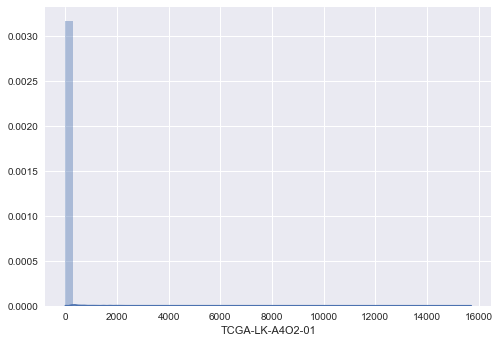

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

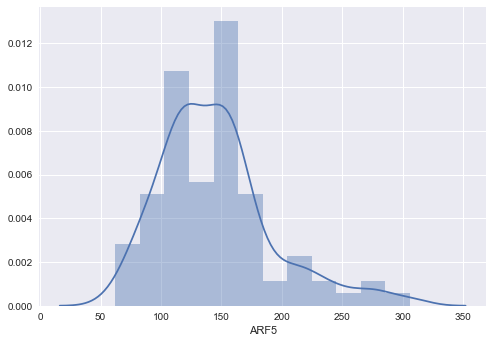

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_meso_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-LK-A4O2-01,TCGA-LK-A4NY-01,TCGA-TS-A7P8-01,TCGA-LK-A4NW-01,TCGA-LK-A4NZ-01,TCGA-LK-A4O0-01,TCGA-MQ-A4KX-01,TCGA-MQ-A4LJ-01,TCGA-MQ-A4LC-01,TCGA-MQ-A4LI-01,...,TCGA-3U-A98E-01,TCGA-ZN-A9VQ-01,TCGA-ZN-A9VP-01,TCGA-3H-AB3M-01,TCGA-UD-AABZ-01,TCGA-TS-A7P3-01,TCGA-3U-A98H-01,TCGA-UD-AAC6-01,TCGA-3U-A98I-01,TCGA-3U-A98G-01
A1BG,0.058779,0.058779,0.058779,0.058779,0.036470,0.058779,0.058779,0.087186,0.058779,0.058779,...,0.058779,0.039749,0.058779,0.058779,0.038087,0.058779,0.058779,0.058779,0.058779,0.058779
A1CF,0.005262,0.028040,0.025808,0.009985,0.014745,0.012536,0.051446,0.012874,0.011529,0.022780,...,0.013545,0.004637,0.032478,0.015188,0.016157,0.017414,0.015438,0.010179,0.006805,0.015530
A2M,84.289700,29.038900,132.975000,160.499000,198.648000,66.037500,74.078300,69.594800,42.616500,123.231000,...,43.464900,34.555000,73.463700,61.564700,8.221850,326.968000,87.618500,107.159000,313.027000,447.421000
A2ML1,0.061677,0.063925,0.104389,0.035714,0.068075,0.024647,0.079245,0.019671,0.049652,0.020397,...,0.014151,0.067166,0.065603,0.053959,0.028904,0.050718,0.036288,0.026995,0.052868,0.139617
A3GALT2,0.020259,0.020061,0.265132,0.086986,0.060390,0.131992,0.079723,0.079723,0.020122,0.079723,...,0.079723,0.092309,0.740794,0.020042,0.079723,0.072843,0.022308,0.030249,0.052397,0.036289


In [34]:
normalized_matrix.shape

(19067, 87)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-LK-A4O2-01,TCGA-LK-A4NY-01,TCGA-TS-A7P8-01,TCGA-LK-A4NW-01,TCGA-LK-A4NZ-01,TCGA-LK-A4O0-01,TCGA-MQ-A4KX-01,TCGA-MQ-A4LJ-01,TCGA-MQ-A4LC-01,TCGA-MQ-A4LI-01,...,TCGA-3U-A98E-01,TCGA-ZN-A9VQ-01,TCGA-ZN-A9VP-01,TCGA-3H-AB3M-01,TCGA-UD-AABZ-01,TCGA-TS-A7P3-01,TCGA-3U-A98H-01,TCGA-UD-AAC6-01,TCGA-3U-A98I-01,TCGA-3U-A98G-01
A1BG,-1.050538,-1.030696,-1.022833,-1.043858,-1.167240,-1.038492,-0.977876,-0.879400,-1.049217,-1.062194,...,-1.003882,-1.213059,-1.018848,-1.045458,-1.223757,-1.044988,-0.949752,-1.050199,-1.042096,-1.053508
A1CF,-2.098594,-1.352144,-1.380302,-1.813718,-1.560531,-1.709556,-1.035740,-1.710139,-1.756637,-1.473856,...,-1.641332,-2.146180,-1.276473,-1.633168,-1.596186,-1.573319,-1.530375,-1.811734,-1.978518,-1.631553
A2M,2.106017,1.663064,2.331717,2.392395,2.568911,2.012079,2.122596,2.022728,1.811141,2.259307,...,1.865038,1.726127,2.078005,1.974654,1.110431,2.700298,2.223624,2.210611,2.684266,2.827989
A2ML1,-1.029637,-0.994243,-0.773398,-1.260238,-0.896187,-1.415956,-0.848124,-1.526020,-1.122503,-1.521849,...,-1.622311,-0.985232,-0.971145,-1.082615,-1.343586,-1.109047,-1.159213,-1.388132,-1.088122,-0.677789
A3GALT2,-1.513133,-1.497554,-0.368591,-0.873628,-0.948207,-0.687164,-0.845514,-0.918268,-1.514768,-0.929832,...,-0.871520,-0.847142,0.081630,-1.512739,-0.902957,-0.951819,-1.370505,-1.338710,-1.092008,-1.262948


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-LK-A4O2-01,TCGA-LK-A4NY-01,TCGA-TS-A7P8-01,TCGA-LK-A4NW-01,TCGA-LK-A4NZ-01,TCGA-LK-A4O0-01,TCGA-MQ-A4KX-01,TCGA-MQ-A4LJ-01,TCGA-MQ-A4LC-01,TCGA-MQ-A4LI-01,...,TCGA-3U-A98E-01,TCGA-ZN-A9VQ-01,TCGA-ZN-A9VP-01,TCGA-3H-AB3M-01,TCGA-UD-AABZ-01,TCGA-TS-A7P3-01,TCGA-3U-A98H-01,TCGA-UD-AAC6-01,TCGA-3U-A98I-01,TCGA-3U-A98G-01
A1BG,-0.986396,-0.987169,-1.115231,-0.990855,-1.249825,-0.956594,-1.215813,-0.890036,-0.970035,-0.995801,...,-0.962986,-1.211128,-1.112202,-1.037960,-1.216998,-1.137196,-1.035400,-1.033970,-1.152035,-1.063323
A1CF,-2.018870,-1.311975,-1.436031,-1.746074,-1.653082,-1.621438,-1.274885,-1.687927,-1.679981,-1.421992,...,-1.604467,-2.117571,-1.363299,-1.626134,-1.609012,-1.668087,-1.626913,-1.821866,-2.117571,-1.704662
A2M,2.073789,1.790627,2.357934,2.398284,2.561497,2.013681,2.084262,2.055723,1.784695,2.340796,...,1.912799,1.636783,2.049161,1.974136,1.217605,2.724072,2.241974,2.238798,2.653050,2.850624
A2ML1,-0.966047,-0.952368,-0.891439,-1.209428,-0.979450,-1.344604,-1.069860,-1.500609,-1.050512,-1.470333,...,-1.585185,-0.998369,-1.064213,-1.074954,-1.341224,-1.202845,-1.247930,-1.385439,-1.196833,-0.669967
A3GALT2,-1.451105,-1.459412,-0.525244,-0.819126,-1.032545,-0.603188,-1.067624,-0.929685,-1.436886,-0.859223,...,-0.820958,-0.873934,-0.040324,-1.497134,-0.873428,-1.047563,-1.456874,-1.332137,-1.202266,-1.275857


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-LK-A4O2-01,TCGA-LK-A4NY-01,TCGA-TS-A7P8-01,TCGA-LK-A4NW-01,TCGA-LK-A4NZ-01,TCGA-LK-A4O0-01,TCGA-MQ-A4KX-01,TCGA-MQ-A4LJ-01,TCGA-MQ-A4LC-01,TCGA-MQ-A4LI-01,...,TCGA-3U-A98E-01,TCGA-ZN-A9VQ-01,TCGA-ZN-A9VP-01,TCGA-3H-AB3M-01,TCGA-UD-AABZ-01,TCGA-TS-A7P3-01,TCGA-3U-A98H-01,TCGA-UD-AAC6-01,TCGA-3U-A98I-01,TCGA-3U-A98G-01
A1BG,0.548731,0.539363,-1.012709,0.494689,-2.643931,0.909919,-2.231718,1.716580,0.747015,0.434747,...,0.832455,-2.174940,-0.975987,-0.076204,-2.246088,-1.278911,-0.045181,-0.027848,-1.458756,-0.383598
A1CF,-1.462937,1.828336,1.250737,-0.192811,0.240157,0.387489,2.001025,0.077920,0.114915,1.316104,...,0.466507,-1.922486,1.589375,0.365624,0.445343,0.170294,0.362000,-0.545696,-1.922486,0.000000
A2M,-0.035433,-0.993445,0.925903,1.062419,1.614611,-0.238794,0.000000,-0.096556,-1.013515,0.867919,...,-0.580105,-1.513940,-0.118756,-0.372587,-2.932128,2.164643,0.533579,0.522834,1.924360,2.592804
A2ML1,0.669833,0.723213,0.960959,-0.279848,0.617537,-0.807311,0.264753,-1.416052,0.340249,-1.297912,...,-1.746071,0.543715,0.286785,0.244875,-0.794125,-0.254162,-0.430086,-0.966652,-0.230703,1.825155
A3GALT2,-1.537341,-1.565931,1.649361,0.637853,-0.096708,1.381084,-0.217445,0.257324,-1.488399,0.499844,...,0.631549,0.449210,3.318394,-1.695766,0.450954,-0.148397,-1.557196,-1.127865,-0.680866,-0.934159


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19067, 87)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

(18634, 87)

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18545, 87)

# Histogram of First Sample

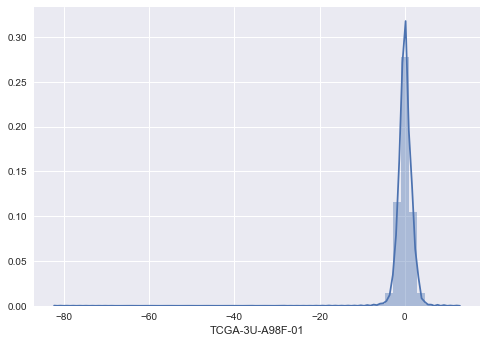

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

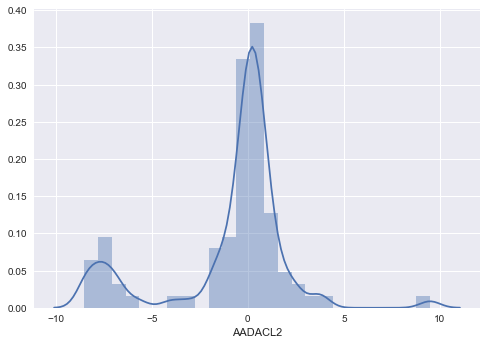

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_meso_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [54]:
gene_list = mf.createGeneList(normalized_matrix)

In [55]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [56]:
gene_list.shape

(18545, 2)

# Save Gene List

In [57]:
filename = path+'tcga_meso_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [58]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [59]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [60]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-3H-AB3K-01,64,MALE,M0,N0,T2,Stage II,Diffuse malignant mesothelioma - NOS,Primary Solid Tumor,Pleura,NaN
TCGA-3H-AB3L-01,60,MALE,M0,N2,TX,Stage III,Diffuse malignant mesothelioma - Epithelioid,Primary Solid Tumor,Pleura,NaN
TCGA-3H-AB3M-01,53,FEMALE,M0,N2,T3,Stage III,Diffuse malignant mesothelioma - Epithelioid,Primary Solid Tumor,Pleura,NaN
TCGA-3H-AB3O-01,58,MALE,M0,N0,T3,Stage III,Diffuse malignant mesothelioma - Epithelioid,Primary Solid Tumor,Pleura,NaN
TCGA-3H-AB3S-01,69,MALE,M0,N0,T2,Stage II,Diffuse malignant mesothelioma - Epithelioid,Primary Solid Tumor,Pleura,NaN


In [61]:
attribute_list.shape

(87, 10)

# Save Attribute List

In [62]:
filename = path+'tcga_meso_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [63]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [64]:
standard_matrix.head()

,TCGA-3H-AB3K-01,TCGA-3H-AB3L-01,TCGA-3H-AB3M-01,TCGA-3H-AB3O-01,TCGA-3H-AB3S-01,TCGA-3H-AB3T-01,TCGA-3H-AB3U-01,TCGA-3H-AB3X-01,TCGA-3U-A98D-01,TCGA-3U-A98E-01,...,TCGA-YS-A95B-01,TCGA-YS-A95C-01,TCGA-YS-AA4M-01,TCGA-ZN-A9VO-01,TCGA-ZN-A9VP-01,TCGA-ZN-A9VQ-01,TCGA-ZN-A9VS-01,TCGA-ZN-A9VU-01,TCGA-ZN-A9VV-01,TCGA-ZN-A9VW-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.655941,0.540813,-0.217795,0.609921,-0.079953,0.770976,0.057983,0.310766,-0.309766,0.724943,...,-0.286705,0.264819,-0.884069,-0.585393,-0.424594,-0.654289,0.563891,0.402776,0.149845,0.218802
A1CF,0.515725,-0.449621,0.285744,-0.357718,-0.495595,-0.610407,-0.288847,-0.082058,-0.886150,0.377731,...,0.953131,0.584802,0.883970,0.860948,0.768881,-0.771330,0.400686,-0.265897,-0.656364,0.239728
A2M,-0.597200,-0.643162,-0.344467,0.575050,-0.114737,0.069095,-0.528253,0.229942,-0.137699,-0.551268,...,-0.804048,-0.022919,0.828211,-0.183734,-0.206656,-0.895877,0.092073,0.275976,-0.505332,0.253013
A2ML1,-0.979140,-0.335902,0.215452,-0.267055,-0.312984,-0.864392,0.353473,-0.703514,0.376523,-0.887312,...,0.123575,0.790709,0.169572,0.077663,0.261581,0.468521,-0.680582,0.675671,-0.290005,-0.037336
A3GALT2,-0.598679,-0.254163,-0.966224,-0.736580,-0.690629,0.504550,0.182460,-0.989181,0.067617,0.458482,...,-0.460853,0.366470,-0.897362,0.757649,0.987881,0.274496,-0.093252,-0.323044,-0.070309,-0.621651


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

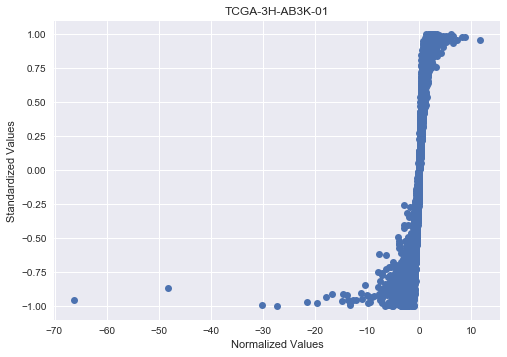

In [65]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [66]:
filename = path+'tcga_meso_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [67]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [68]:
tertiary_matrix.head()

,TCGA-3H-AB3K-01,TCGA-3H-AB3L-01,TCGA-3H-AB3M-01,TCGA-3H-AB3O-01,TCGA-3H-AB3S-01,TCGA-3H-AB3T-01,TCGA-3H-AB3U-01,TCGA-3H-AB3X-01,TCGA-3U-A98D-01,TCGA-3U-A98E-01,...,TCGA-YS-A95B-01,TCGA-YS-A95C-01,TCGA-YS-AA4M-01,TCGA-ZN-A9VO-01,TCGA-ZN-A9VP-01,TCGA-ZN-A9VQ-01,TCGA-ZN-A9VS-01,TCGA-ZN-A9VU-01,TCGA-ZN-A9VV-01,TCGA-ZN-A9VW-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,-1,0,0,0,0,-1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Save Teriary Matrix

In [69]:
filename = path+'tcga_meso_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [70]:
name = 'tcga_meso_gene_up_set'

In [71]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [72]:
name = 'tcga_meso_gene_down_set'

In [73]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [74]:
name = 'tcga_meso_attribute_up_set'

In [75]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [76]:
name = 'tcga_meso_attribute_down_set'

In [77]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [78]:
attribute_normalized_matrix = normalized_matrix.copy()

In [79]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [80]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [81]:
attribute_similarity_matix.head()

,"(Donor:TCGA-3H-AB3K, Age:64.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Diffuse malignant mesothelioma - NOS, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-3H-AB3L, Age:60.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-3H-AB3M, Age:53.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-3H-AB3O, Age:58.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-3H-AB3S, Age:69.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-3H-AB3T, Age:79.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Diffuse malignant mesothelioma - Biphasic, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-3H-AB3U, Age:71.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-3H-AB3X, Age:62.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-3U-A98D, Age:80.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Diffuse malignant mesothelioma - Biphasic, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-3U-A98E, Age:71.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)",...,"(Donor:TCGA-YS-A95B, Age:28.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-YS-A95C, Age:54.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-YS-AA4M, Age:66.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Diffuse malignant mesothelioma - NOS, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-ZN-A9VO, Age:36.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-ZN-A9VP, Age:51.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-ZN-A9VQ, Age:61.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Diffuse malignant mesothelioma - Biphasic, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-ZN-A9VS, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-ZN-A9VU, Age:70.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Diffuse malignant mesothelioma - Epithelioid, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-ZN-A9VV, Age:68.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage III, Histology:Diffuse malignant mesothelioma - Biphasic, Tissue:Pleura, Tumor:nan, Gradenan)","(Donor:TCGA-ZN-A9VW, Age:61.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Diffuse malignant mesothelioma - Biphasic, Tissue:Pleura, Tumor:nan, Gradenan)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-3H-AB3K, Age:64.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Diffuse malignant mesothelioma - NOS, Tissue:Pleura, Tumor:nan, Gradenan)",1.000000,0.043783,0.003315,0.005397,0.022219,0.038167,0.015333,-0.014419,-0.018389,0.208756,

# Save Attribute Similarity Matrix

In [82]:
filename = path+'tcga_meso_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [83]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [84]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [85]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.075961,-0.091906,-0.113723,-0.028665,0.142167,0.065351,0.157648,-0.384072,-0.111004,...,-0.046288,0.123230,0.000313,-0.206182,-0.376425,0.015368,-0.277007,0.094194,-0.200790,-0.275922
A1CF,0.075961,1.000000,-0.051088,0.173191,-0.057043,-0.016961,0.103586,0.047597,0.139732,0.035485,...,0.008598,0.043428,-0.021584,-0.100737,-0.091434,-0.064484,0.081799,-0.012642,0.100322,0.255018
A2M,-0.091906,-0.051088,1.000000,0.128213,0.088494,0.234676,0.155312,-0.194403,-0.131201,-0.021722,...,0.098259,-0.196209,-0.020719,-0.353400,-0.139885,-0.205292,0.011063,0.203348,-0.048074,0.231445
A2ML1,-0.113723,0.173191,0.128213,1.000000,0.082864,0.023599,0.178037,0.028069,-0.080050,-0.059791,...,0.214005,-0.077174,0.235122,0.072021,-0.022004,-0.068811,0.093374,0.016780,0.212037,0.191211
A3GALT2,-0.028665,-0.057043,0.088494,0.082864,1.000000,-0.100046,0.191150,-0.046632,-0.090461,0.003540,...,0.082496,-0.078464,-0.157257,-0.093766,0.041499,0.188367,0.104995,0.153872,-0.147358,-0.103874


# Save Gene Similarity Matrix

In [86]:
filename = path+'tcga_meso_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [87]:
name = 'tcga_meso_gene_attribute_edge_list'

In [88]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  87 Out of 87   

 The number of statisticaly relevent gene-attribute associations is: 81072
